# Influence Measures for GLM Logit


Based on draft version for GLMInfluence, which will also apply to discrete Logit, Probit and Poisson, and eventually be extended to cover most models outside of time series analysis.

The example for logistic regression was used by Pregibon (1981) "Logistic Regression diagnostics" and is based on data by Finney (1947).

GLMInfluence includes the basic influence measures but still misses some measures described in Pregibon (1981), for example those related to deviance and effects on confidence intervals.

In [1]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [2]:
import statsmodels.stats.tests.test_influence

test_module = statsmodels.stats.tests.test_influence.__file__
cur_dir = cur_dir = os.path.abspath(os.path.dirname(test_module))

file_name = "binary_constrict.csv"
file_path = os.path.join(cur_dir, "results", file_name)
df = pd.read_csv(file_path, index_col=0)

In [3]:
res = GLM(
    df["constrict"],
    df[["const", "log_rate", "log_volumne"]],
    family=families.Binomial(),
).fit(attach_wls=True, atol=1e-10)
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              constrict   No. Observations:                   39
Model:                            GLM   Df Residuals:                       36
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.614
Date:                Wed, 02 Nov 2022   Deviance:                       29.227
Time:                        17:10:15   Pearson chi2:                     34.2
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4707
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.8754      1.321     -2.177      

## get the influence measures

GLMResults has a `get_influence` method similar to OLSResults, that returns and instance of the GLMInfluence class. This class has methods and (cached) attributes to inspect influence and outlier measures.

This measures are based on a one-step approximation to the the results for deleting one observation. One-step approximations are usually accurate for small changes but underestimate the magnitude of large changes. Event though large changes are underestimated, they still show clearly the effect of influential observations

In this example observation 4 and 18 have a large standardized residual and large Cook's distance, but not a large leverage. Observation 13 has the largest leverage but only small Cook's distance and not a large studentized residual.

Only the two observations 4 and 18 have a large impact on the parameter estimates.

In [4]:
infl = res.get_influence(observed=False)

In [5]:
summ_df = infl.summary_frame()
summ_df.sort_values("cooks_d", ascending=False)[:10]

,dfb_const,dfb_log_rate,dfb_log_volumne,cooks_d,standard_resid,hat_diag,dffits_internal
Case,,,,,,,
4,1.073359,-0.930200,-1.017953,0.429085,3.681352,0.086745,1.134573
18,0.959508,-0.827905,-0.847666,0.328152,3.055542,0.095386,0.992197
19,-0.259120,0.202363,-0.004883,0.066770,-1.150095,0.131521,-0.447560
29,0.236747,-0.194984,0.028643,0.065370,0.984729,0.168219,0.442844
31,0.116501,-0.099602,0.132197,0.055382,0.713771,0.245917,0.407609
24,-0.128107,0.041039,-0.100410,0.051950,-1.420261,0.071721,-0.394777
13,-0.093083,-0.009463,0.177532,0.046492,-0.847046,0.162757,-0.373465
23,-0.196119,0.127482,0.035689,0.031168,-1.065576,0.076085,-0.305786
33,-0.088174,-0.013657,-0.002161,0.027481,-1.238185,0.051031,-0.287130


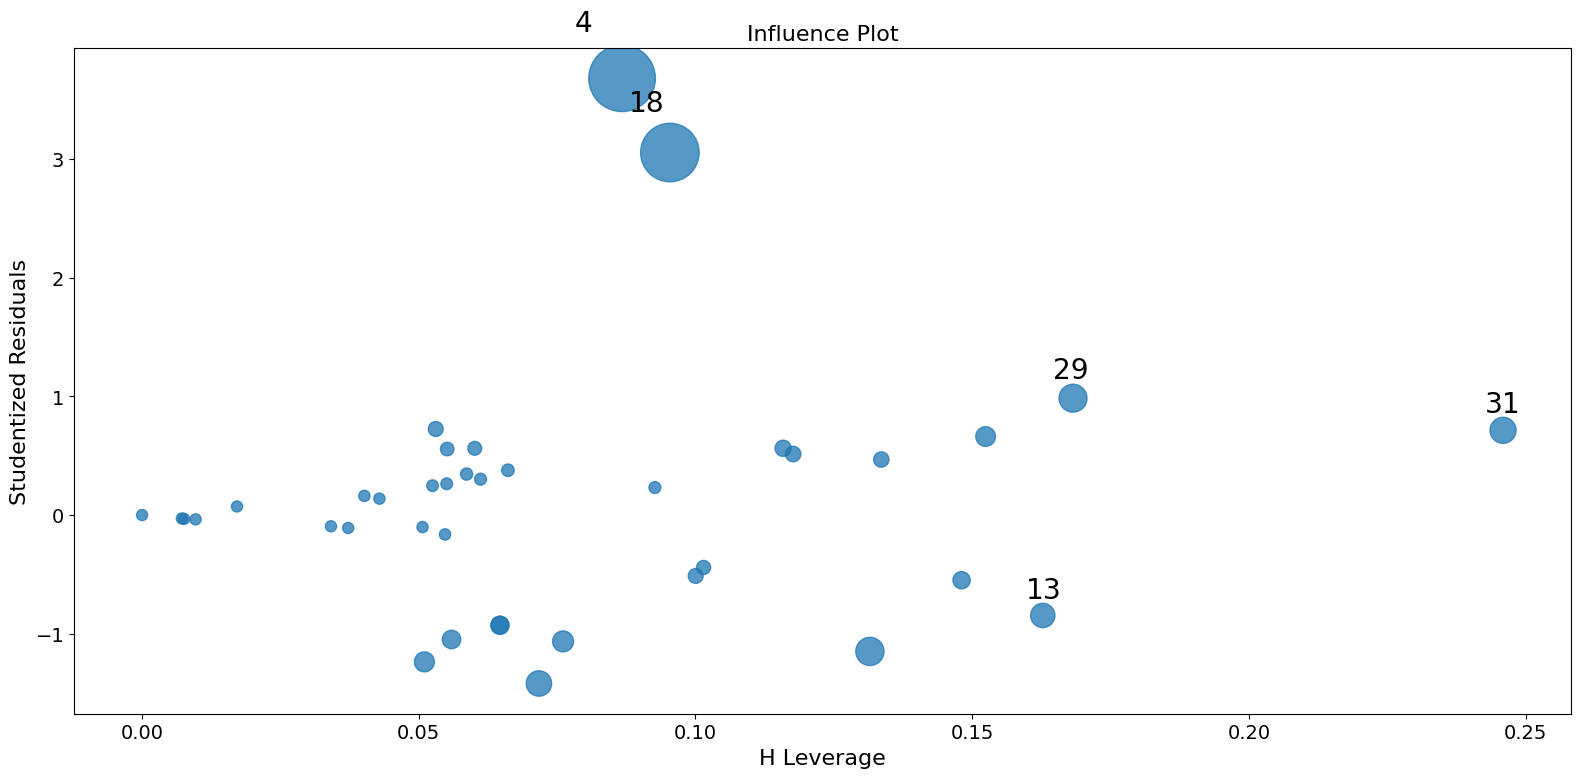

In [6]:
fig = infl.plot_influence()
fig.tight_layout(pad=1.0)

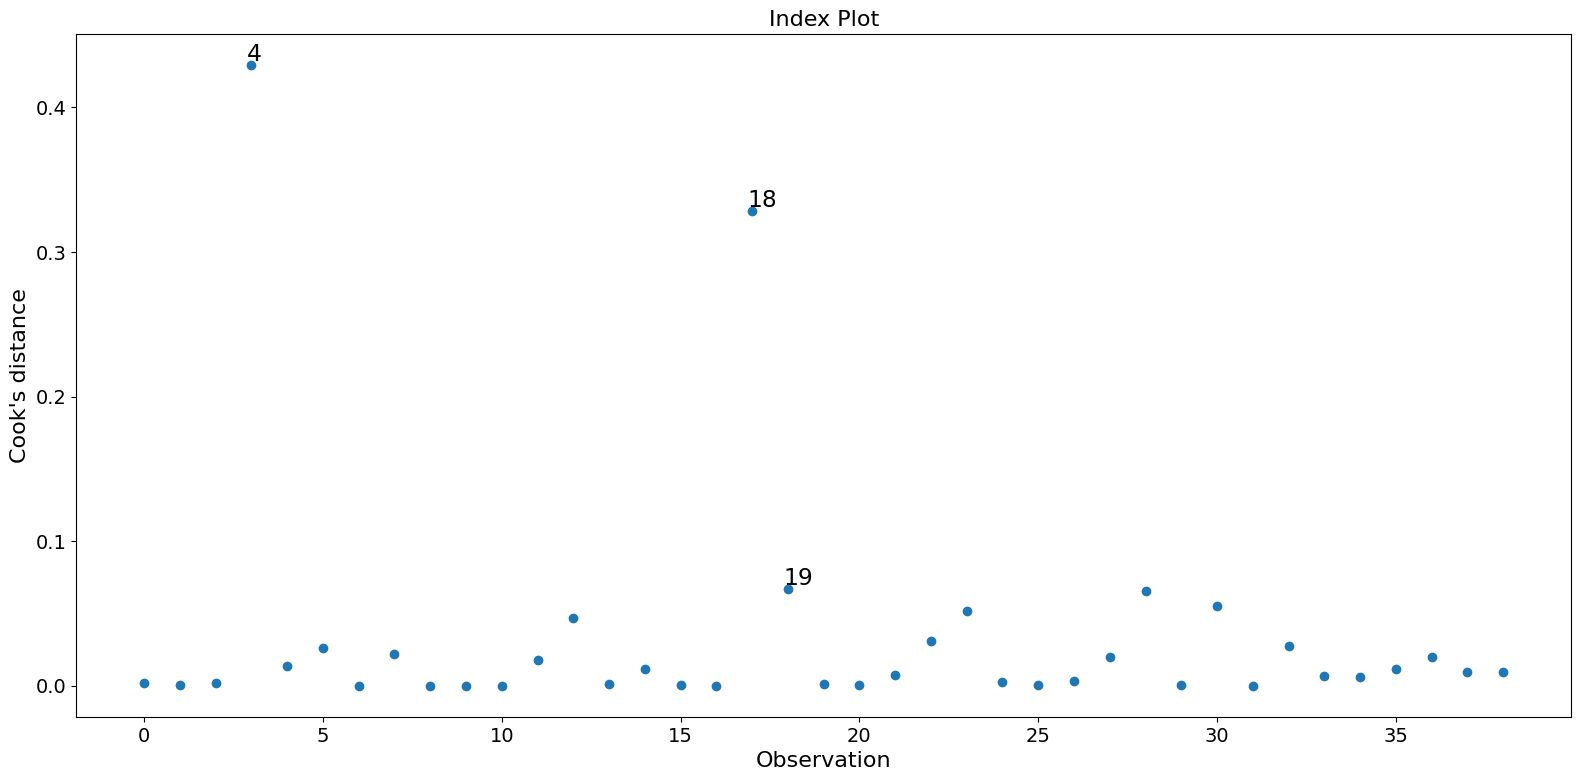

In [7]:
fig = infl.plot_index(y_var="cooks", threshold=2 * infl.cooks_distance[0].mean())
fig.tight_layout(pad=1.0)

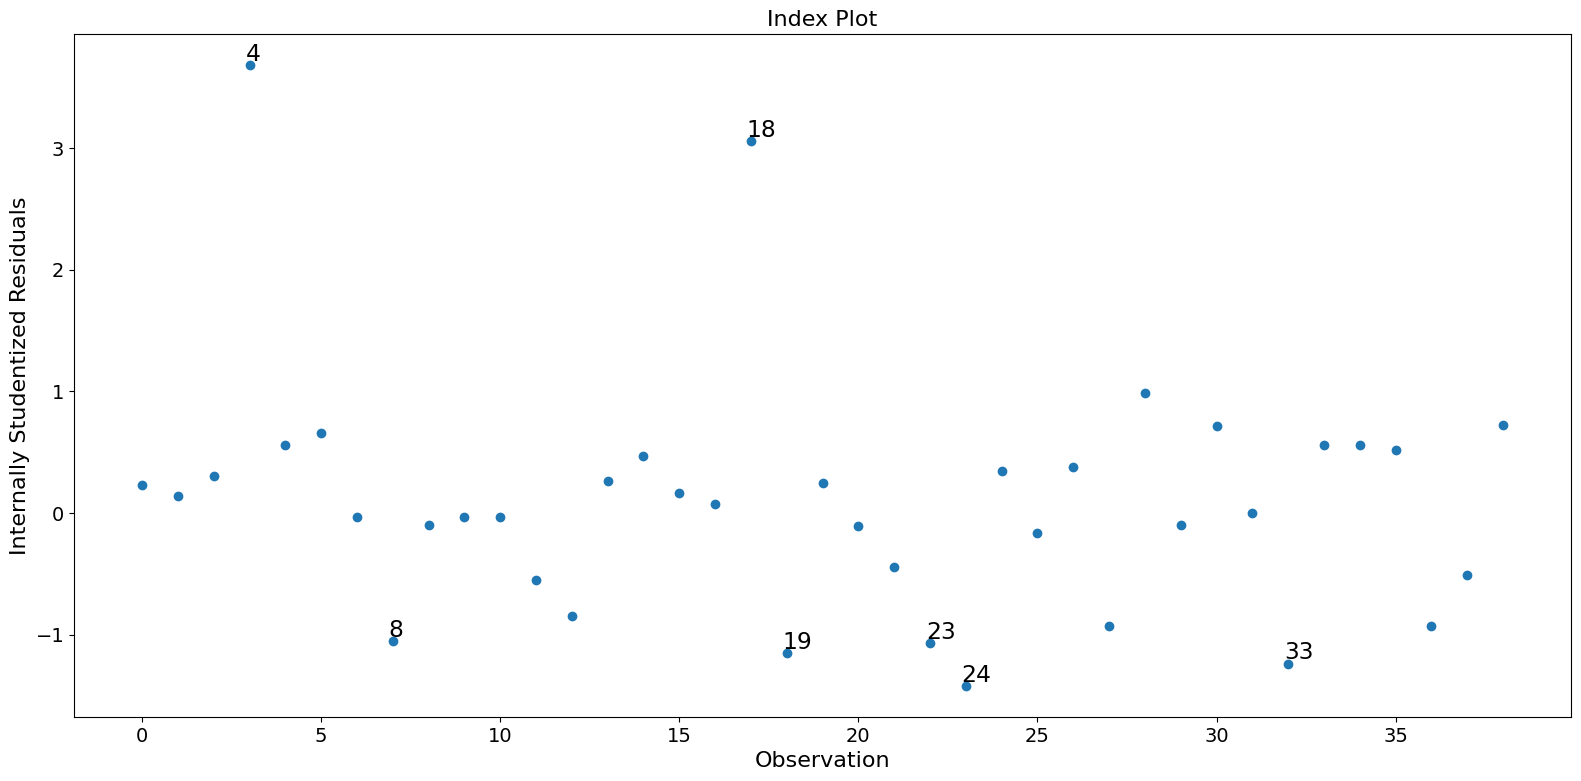

In [8]:
fig = infl.plot_index(y_var="resid", threshold=1)
fig.tight_layout(pad=1.0)

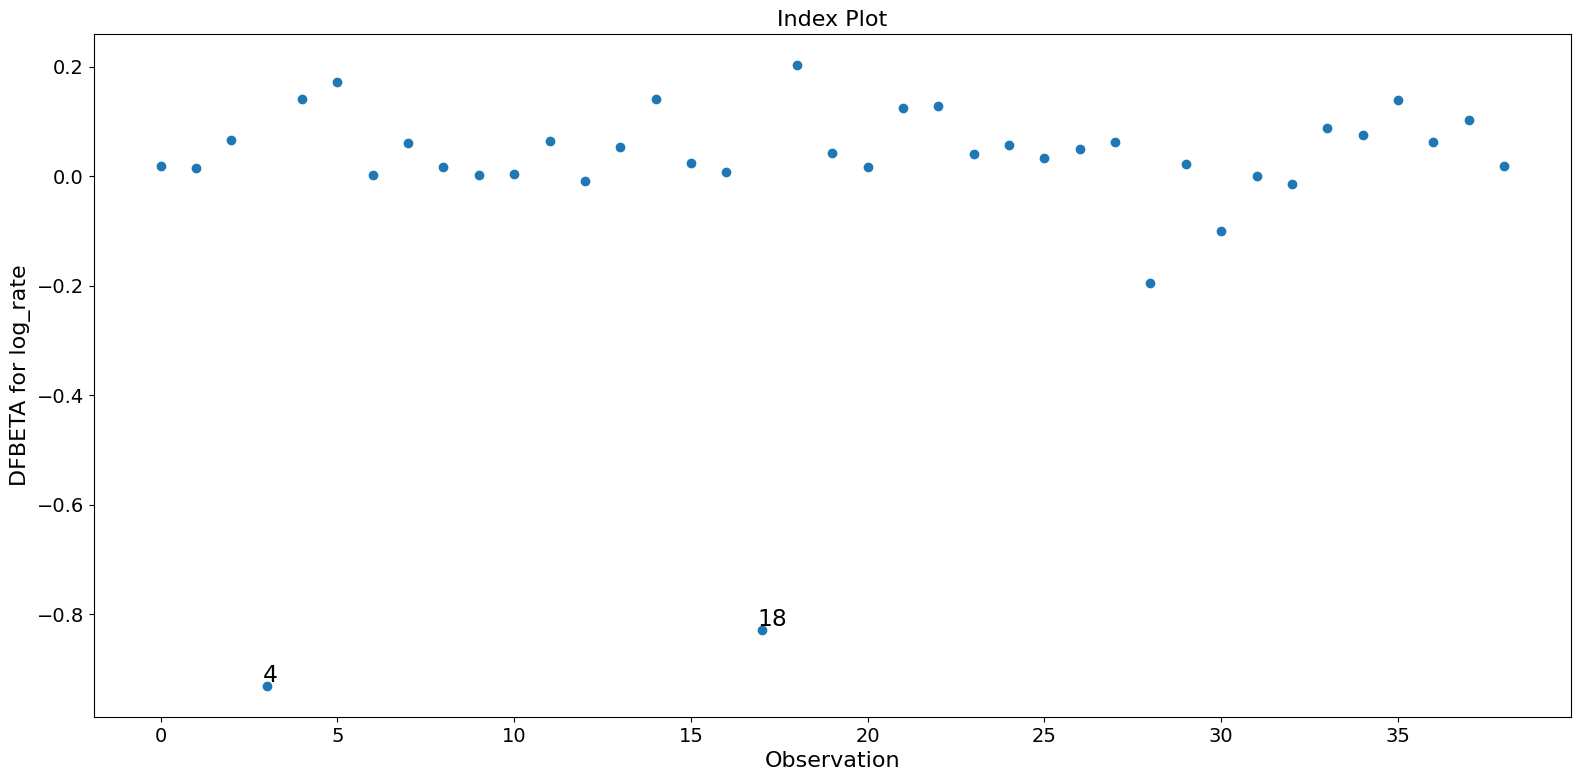

In [9]:
fig = infl.plot_index(y_var="dfbeta", idx=1, threshold=0.5)
fig.tight_layout(pad=1.0)

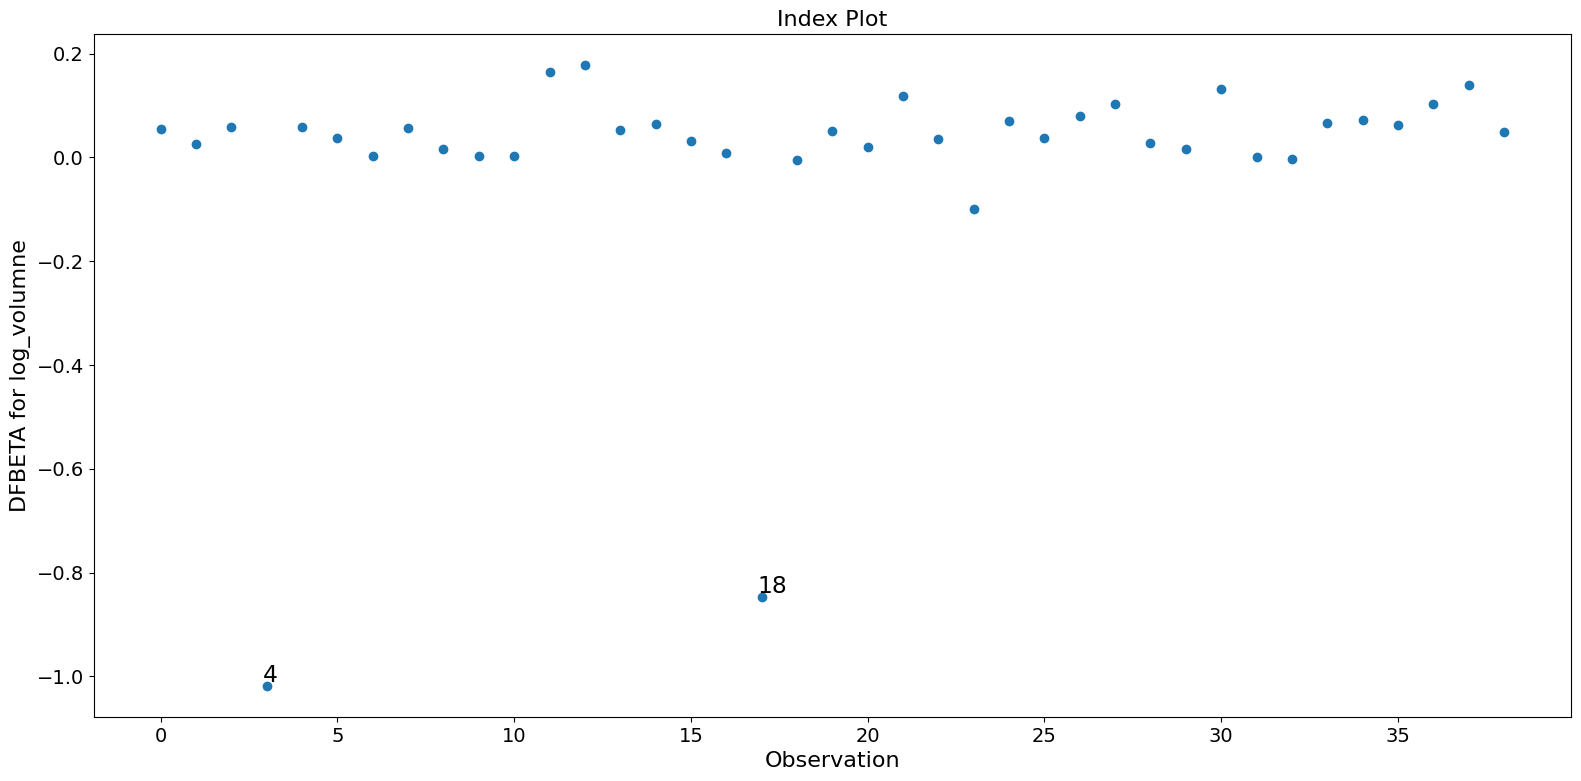

In [10]:
fig = infl.plot_index(y_var="dfbeta", idx=2, threshold=0.5)
fig.tight_layout(pad=1.0)

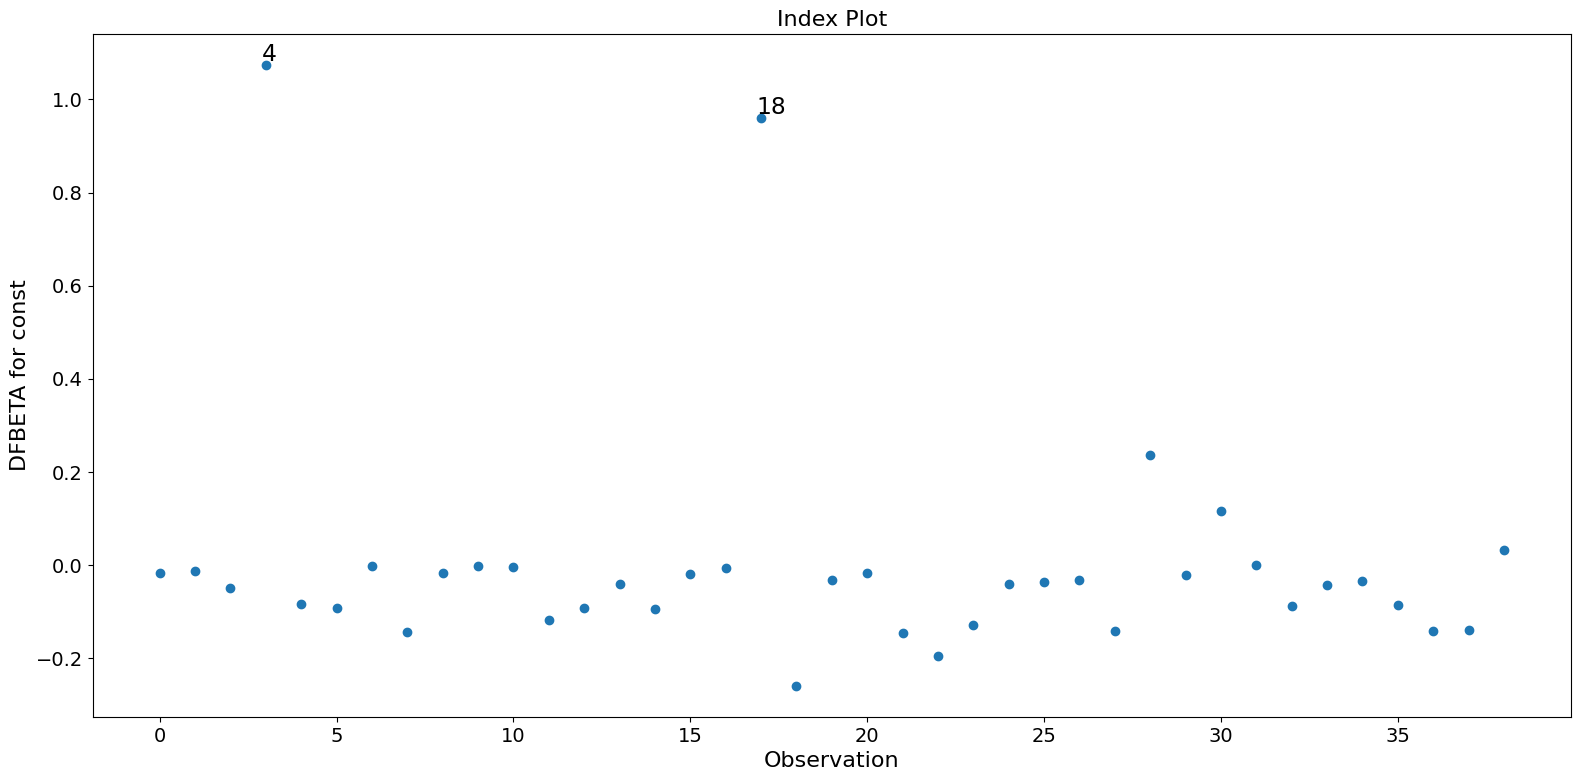

In [11]:
fig = infl.plot_index(y_var="dfbeta", idx=0, threshold=0.5)
fig.tight_layout(pad=1.0)